In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import scipy.integrate as integrate
import mpmath as mp

In [3]:
# Onsager Exact solution Generator
def C(T,J=1):
    b = 1/T #beta
    k = 2*np.sinh(2*b*J)/(np.cosh(2*b*J)**2)   #kappa
    K1, _ = integrate.quad(lambda x: 1/np.sqrt(1-k**2*np.sin(x)**2),0,np.pi/2)
    E1, _ = integrate.quad(lambda x: np.sqrt(1-k**2*np.sin(x)**2),0,np.pi/2)
    tanh = np.tanh(2*b*J)
    return 4/np.pi*((b*J/tanh)**2)*(K1-E1-(1-tanh**2)*(np.pi/2+(2*tanh**2-1)*K1)) # boltzman k = 1

def C2(T,J=1):
    b = 1/T
    Tc = 2/np.log(1+np.sqrt(2))
    return -2/np.pi*(2*J*b)**2*np.log(np.abs(1-T/Tc))

def C3(T,J=1):
    b = 1/T #beta
    k = 2*np.sinh(2*b*J)/(np.cosh(2*b*J)**2)   #kappa
    mp.mp.dps = 50
    K1 = mp.quad(lambda x: 1/mp.sqrt(1-k**2*mp.sin(x)**2),[0,mp.pi/2])
    E1 = mp.quad(lambda x: mp.sqrt(1-k**2*mp.sin(x)**2),[0,mp.pi/2])
    tanh = np.tanh(2*b*J)
    return 4/np.pi*((b*J/tanh)**2)*(K1-E1-(1-tanh**2)*(np.pi/2+(2*tanh**2-1)*K1)) # boltzman k = 1

_Ebin = 100
ExactT = np.zeros(_Ebin)
Exactm = np.zeros_like(ExactT)

Critical_Temp = 2/np.log(1+np.sqrt(2))

for i in range(len(Exactm)):
    ExactT[i] = (Critical_Temp-0.01)/_Ebin*(i+1)
    Exactm[i] = (1-np.sinh(2*(1/ExactT[i]))**-4)**(1/8)

ExactT = np.append(ExactT,Critical_Temp)
Exactm = np.append(Exactm,0)

_Ebin2 = 200
ExactT2 = np.zeros(_Ebin2)
ExactC = np.zeros_like(ExactT2)

for i in range(len(ExactC)):
    ExactT2[i] = 5/_Ebin2*(i+1)
    ExactC[i] = C(ExactT2[i])


In [ ]:
# Figure 1: Naive Calculation and Exact soiution
def Fig1a2():
    Data, MM, CC = [None]*4, [None]*4, [None]*4
    Data[0] = pd.read_csv("../C++/Result/Exact_Calculation/Exact_cpp_2_int40_1.csv")
    Data[1] = pd.read_csv("../C++/Result/Exact_Calculation/Exact_cpp_3_int40_1.csv")
    Data[2] = pd.read_csv("../C++/Result/Exact_Calculation/Exact_cpp_4_int40_1.csv")
    Data[3] = pd.read_csv("../C++/Result/Exact_Calculation/Exact_cpp_5_int40_1.csv")

    Label = ["L2","L3","L4","L5"]
    Marker = ['o','v','^','s']

    TT = Data[0].iloc[:,1].values

    plt.style.use('seaborn-whitegrid')
    plt.figure(dpi=600)
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.plot(ExactT,Exactm, color='black',linestyle='-.')

    for i in range(4):
        plt.plot(TT,Data[i].iloc[:,2].values,label=Label[i], marker=Marker[i], markersize=5)

    plt.ylim(0,1.05)
    plt.xlim(0,5)
    plt.text(2.27, -0.05, '$T_c$', ha='center')

    plt.ylabel('magnetization per spin m')
    plt.xlabel('Temperature T')
    plt.legend()
    plt.show()

    #Fig 2,
    plt.style.use('seaborn-whitegrid')
    plt.figure(dpi=600)
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.plot(ExactT2,ExactC, color='black',linestyle='-.')

    for i in range(4):
        plt.plot(TT,Data[i].iloc[:,3].values,label=Label[i], marker=Marker[i], markersize=5)

    plt.ylim(-0.1,2)
    plt.xlim(0,5)
    plt.text(2.27, -0.2, '$T_c$', ha='center')

    plt.ylabel('Specific heat c')
    plt.xlabel('Temperature T')
    plt.legend()
    plt.show()

Fig1a2()

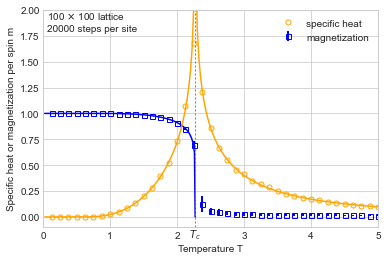

In [25]:
a = pd.read_csv("../C++/Metropolis_c_100_40int.csv")
T2 = a.iloc[:,1].values
M2 = a.iloc[:,2].values
C2 = a.iloc[:,3].values
M2error = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))

plt.style.use('seaborn-whitegrid')
plt.rcParams['text.usetex'] = False

plt.ylim(-0.1,2)
plt.xlim(0,5)
plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5, color='b', label='magnetization',mfc='none')
plt.plot(T2,C2,linestyle='', marker='o', markersize=5, color='orange', label='specific heat',mfc='none')
plt.plot(ExactT,Exactm, color='b')
plt.plot(ExactT2,ExactC, color='orange')


plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
plt.legend()
plt.text(0.05,1.91,"100 $\\times$ 100 lattice")
plt.text(0.05,1.79,"20000 steps per site")
plt.text(2.27, -0.2, '$T_c$', ha='center')


plt.ylabel('Specific heat or magnetization per spin m')
plt.xlabel('Temperature T')
plt.show()

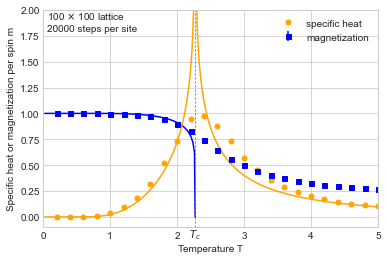

In [7]:
a = pd.read_csv("../C++/Wolff_c_5_int25.csv")
T2 = a.iloc[:,1].values
M2 = a.iloc[:,2].values
C2 = a.iloc[:,3].values
M2error = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))

plt.style.use('seaborn-whitegrid')

plt.ylim(-0.1,2)
plt.xlim(0,5)
plt.errorbar(T2,M2,M2error,linestyle='', marker='s', markersize=5, color='b', label='magnetization')
plt.plot(T2,C2, linestyle='', marker='o', markersize=5, color='orange', label='specific heat')
plt.plot(ExactT,Exactm, color='b')
plt.plot(ExactT2,ExactC, color='orange')


plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
plt.legend()
plt.text(0.05,1.91,"100 $\\times$ 100 lattice")
plt.text(0.05,1.79,"20000 steps per site")
plt.text(2.27, -0.2, '$T_c$', ha='center')


plt.ylabel('Specific heat or magnetization per spin m')
plt.xlabel('Temperature T')
plt.show()

(-0.1, 1.0)

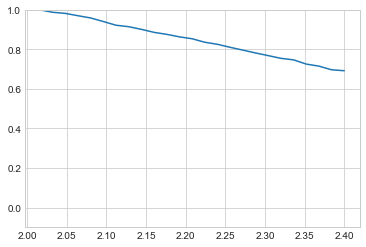

In [148]:
lat_size = a.iloc[:,8].values
plt.style.use('seaborn-whitegrid')
plt.plot(T2,lat_size/max(lat_size))
plt.ylim(-0.1,1)

In [127]:
Merror = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))
Merror

array([4.53384189e-07, 4.53384189e-07, 4.53384189e-07, 3.36860302e-06,
       2.59801280e-05, 7.30765067e-05, 1.61982524e-04, 2.98699767e-04,
       4.78846715e-04, 7.42169110e-04, 1.07817314e-03, 1.50389705e-03,
       2.09146483e-03, 2.92261752e-03, 4.15729168e-03, 6.58373175e-03,
       1.63664923e-02, 3.84328129e-02, 7.69305470e-02, 3.04441134e-02,
       2.64140385e-02, 1.98239127e-02, 1.74707158e-02, 1.48068023e-02,
       1.38107134e-02, 1.27539642e-02, 1.17285825e-02, 1.11081934e-02,
       1.05680235e-02, 9.89998332e-03, 9.51637581e-03, 9.39641766e-03,
       8.96897633e-03, 8.72133501e-03, 8.60393545e-03, 8.28127893e-03,
       8.03640007e-03, 7.97855875e-03, 7.78998789e-03, 7.51684202e-03])

In [28]:
b = pd.read_csv("Metropolis_python.csv")
T3 = b.iloc[:,1].values
M3 = b.iloc[:,2].values
C3 = b.iloc[:,3].values

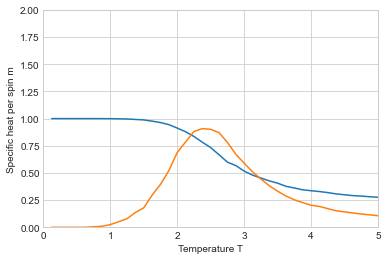

In [29]:
plt.style.use('seaborn-whitegrid')
plt.ylim(0,2)
plt.xlim(0,5)
plt.plot(T2,M2)
plt.plot(T2,C2)

plt.ylabel('Specific heat per spin m')
plt.xlabel('Temperature T')
plt.show()

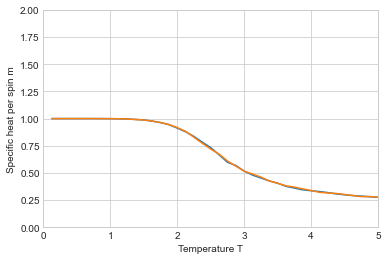

In [30]:
plt.style.use('seaborn-whitegrid')
plt.ylim(0,2)
plt.xlim(0,5)
plt.plot(T2,M2)
plt.plot(T3,M3)

plt.ylabel('Specific heat per spin m')
plt.xlabel('Temperature T')
plt.show()

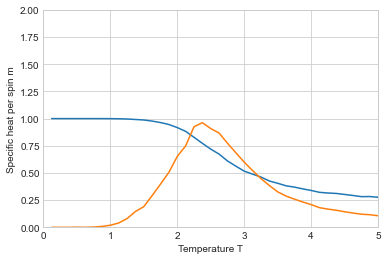

In [31]:
plt.style.use('seaborn-whitegrid')
plt.ylim(0,2)
plt.xlim(0,5)
plt.plot(T3,M3)
plt.plot(T3,C3)

plt.ylabel('Specific heat per spin m')
plt.xlabel('Temperature T')
plt.show()

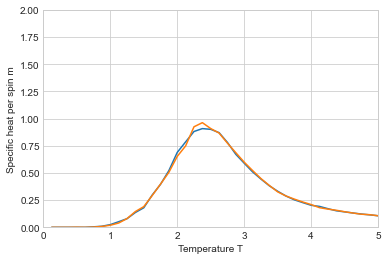

In [32]:
plt.style.use('seaborn-whitegrid')
plt.ylim(0,2)
plt.xlim(0,5)
plt.plot(T2,C2)
plt.plot(T3,C3)

plt.ylabel('Specific heat per spin m')
plt.xlabel('Temperature T')
plt.show()